# Self Organizing Map To Group Wines By Type

In [1]:
import minisom
import pandas as pd
import matplotlib

In [2]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [4]:
dataset = pd.read_csv('wines.csv')
dataset

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [41]:
x = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, 0].values

In [42]:
normalizer = MinMaxScaler(feature_range= (0, 1))
x = normalizer.fit_transform(x)

In [55]:
model = MiniSom(x= 8, y= 8, input_len= 13, sigma= 1.0, learning_rate= 0.5, random_seed= 2)

In [56]:
model.random_weights_init(x)

In [57]:
model.train_random(data= x, num_iteration= 1000)

In [58]:
model._weights, model._weights.shape

(array([[[0.68228832, 0.25690743, 0.69594824, 0.43772549, 0.43952036,
          0.60479747, 0.51909633, 0.50106064, 0.44747769, 0.26698177,
          0.56739255, 0.64653461, 0.4654153 ],
         [0.67786657, 0.29413408, 0.64496988, 0.43391726, 0.37533827,
          0.46720422, 0.35823428, 0.50217998, 0.28489091, 0.32502916,
          0.43371084, 0.56779455, 0.49201278],
         [0.59692604, 0.44668422, 0.67295208, 0.55712835, 0.31419695,
          0.23052152, 0.04484491, 0.70117159, 0.10160925, 0.32469498,
          0.29777328, 0.31373222, 0.25273444],
         [0.44665738, 0.46918282, 0.67006018, 0.68184127, 0.34512183,
          0.28550534, 0.06316142, 0.87525225, 0.18494715, 0.40193804,
          0.27225599, 0.2706292 , 0.28045605],
         [0.24832831, 0.34544328, 0.74269927, 0.78692518, 0.27577704,
          0.36843286, 0.35039046, 0.82990673, 0.35025319, 0.18162564,
          0.42054924, 0.44639762, 0.16441094],
         [0.39547433, 0.58442679, 0.63797172, 0.69488789, 0.33924

In [59]:
model._activation_map, model._activation_map.shape

(array([[0.76137731, 0.77746612, 1.0593412 , 1.15341022, 0.93176103,
         0.78652378, 1.00752701, 1.0261566 ],
        [0.94524538, 0.78920913, 0.77438876, 0.82643819, 0.52572395,
         0.52878628, 0.56290445, 0.61450867],
        [0.87945703, 0.85376798, 0.82821758, 0.71567901, 0.39460438,
         0.48277343, 0.38318963, 0.75460731],
        [1.08452639, 1.27044339, 1.16704102, 0.81883174, 0.61434562,
         0.50259432, 0.41990744, 0.47769354],
        [1.16368378, 1.27575003, 1.17764003, 1.00947487, 1.04593282,
         0.76126914, 0.71123713, 0.64757959],
        [1.34119606, 1.02948618, 0.69330463, 0.67364605, 0.75756721,
         0.68477024, 0.58260988, 0.84718385],
        [0.76612476, 0.56026289, 0.68581549, 0.74518418, 0.95197792,
         0.73477077, 0.57666416, 0.58782204],
        [0.56756015, 0.44389739, 0.83863546, 0.88604862, 1.11791956,
         0.82052188, 0.22605371, 0.31785415]]),
 (8, 8))

In [60]:
q = model.activation_response(x)
q, q.shape

(array([[4., 0., 4., 3., 2., 2., 2., 1.],
        [6., 5., 0., 0., 0., 4., 2., 0.],
        [0., 0., 4., 3., 2., 5., 3., 3.],
        [3., 2., 2., 0., 1., 1., 0., 1.],
        [6., 8., 4., 4., 4., 1., 6., 0.],
        [5., 4., 0., 0., 1., 1., 3., 3.],
        [1., 1., 4., 6., 5., 7., 4., 2.],
        [3., 4., 3., 5., 5., 4., 3., 6.]]),
 (8, 8))

In [61]:
model.distance_map()

array([[0.16472151, 0.3403735 , 0.47898892, 0.47277807, 0.4541865 ,
        0.42416877, 0.54703074, 0.33976232],
       [0.372639  , 0.63408769, 0.61103772, 0.70349268, 0.60907012,
        0.56955747, 0.79315446, 0.49118221],
       [0.4440825 , 0.68388606, 0.84771124, 0.81960753, 0.74163156,
        0.5429217 , 0.5828186 , 0.58757537],
       [0.53914298, 0.95465138, 0.81615628, 0.72155909, 0.6724248 ,
        0.54390441, 0.53927521, 0.45270243],
       [0.38639753, 0.6974998 , 0.81268795, 0.78929089, 0.7838645 ,
        0.65842779, 0.64269162, 0.33146028],
       [0.56665177, 0.88955807, 0.8039075 , 0.74392435, 0.87809363,
        0.81987523, 0.70445264, 0.50740688],
       [0.59582803, 0.98407968, 0.734732  , 0.60968224, 0.70402518,
        0.90727749, 1.        , 0.5368477 ],
       [0.31311534, 0.54038228, 0.41235158, 0.32549352, 0.39503688,
        0.47700967, 0.50582204, 0.2356771 ]])

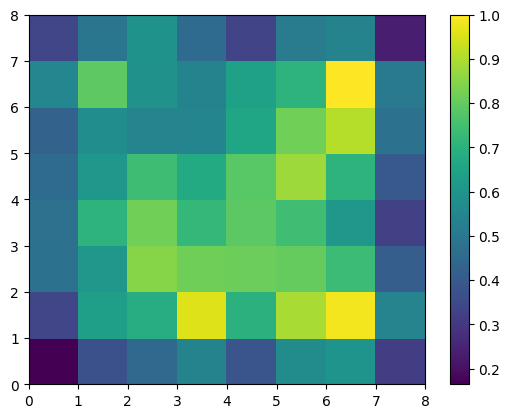

In [62]:
pcolor(model.distance_map().T)
colorbar()

In [63]:
w = model.winner(x[0])
w

(7, 3)

In [64]:
markers = ['o', 's', 'D']
color = ['r', 'g', 'b']

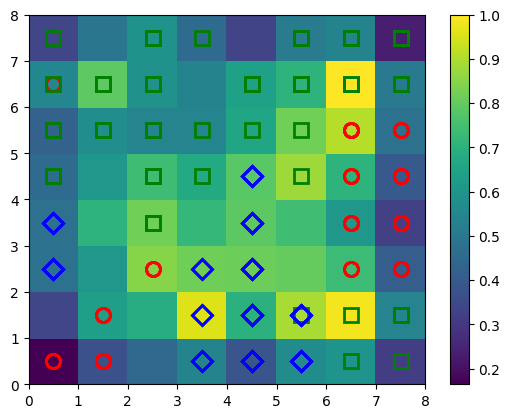

In [65]:
pcolor(model.distance_map().T)
colorbar()

for i, element in enumerate(x):
    #print(i)
    #print(x)
    w = model.winner(element)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]-1], markerfacecolor= 'None', markeredgecolor= color[y[i]-1], markeredgewidth= 2, markersize= 10)
